## 데이터 전처리
- 제목에 직군 이름 혹은 관련 내용이 들어간 경우만 추출
- 정규직, 인턴, 계약직, 프리랜서 타입만 추출
- 날짜 제거
- 중복 제거
- 서울, 경기, 충북, 강원 등 앞 부분만 추출

In [77]:
import pandas as pd

In [78]:
df = pd.read_csv('crawling_job_all.csv')
df[20:25]

,company,title,url,exp,edu,typ,loc,date,job_name
20,더치트주식회사,데이터 애널리스트 / 데이터분석 전문가 / 통계 전문가 / Data Analyst (통,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,대졸↑,정규직 외,서울 구로구,D-22,데이터 분석가
21,㈜누리미디어,[서비스] 데이터 애널리스트 (경력),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력6년↑,학력무관,정규직,서울 마포구,D-40,데이터 분석가
22,㈜기어세컨드,데이터 엔지니어(DE) 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,학력무관,정규직,서울 마포구,D-46,데이터 분석가
23,㈜나누리아이티,증권업무 분석설계자 구인합니다.,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력,학력무관,정규직 외,서울 영등포구,D-3,데이터 분석가
24,㈜조인아이티,"Si(생명차세대-기간계및채널 분석,설계)/여의도/25.1-2년/다수(중급,고급)/",https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력6년↑,학력무관,계약직 외,서울 영등포구,D-18,데이터 분석가


#### 직업 타입

In [79]:
job_type = ['정규직', '인턴', '계약직', '프리랜서']

In [80]:
df_type = df[df['typ'].str.contains('|'.join(job_type))]
df_type[20:25]

,company,title,url,exp,edu,typ,loc,date,job_name
20,더치트주식회사,데이터 애널리스트 / 데이터분석 전문가 / 통계 전문가 / Data Analyst (통,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,대졸↑,정규직 외,서울 구로구,D-22,데이터 분석가
21,㈜누리미디어,[서비스] 데이터 애널리스트 (경력),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력6년↑,학력무관,정규직,서울 마포구,D-40,데이터 분석가
22,㈜기어세컨드,데이터 엔지니어(DE) 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,학력무관,정규직,서울 마포구,D-46,데이터 분석가
23,㈜나누리아이티,증권업무 분석설계자 구인합니다.,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력,학력무관,정규직 외,서울 영등포구,D-3,데이터 분석가
24,㈜조인아이티,"Si(생명차세대-기간계및채널 분석,설계)/여의도/25.1-2년/다수(중급,고급)/",https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력6년↑,학력무관,계약직 외,서울 영등포구,D-18,데이터 분석가


#### 제목에 직군 이름이 들어간 경우만

In [81]:
df_lower = df_type.copy()

df_lower['title'] = df_lower['title'].str.lower()
df_lower.head(10)

,company,title,url,exp,edu,typ,loc,date,job_name
0,㈜기어세컨드,데이터 분석가 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력무관,학력무관,정규직,서울 마포구,D-30,데이터 분석가
1,㈜넥슨,[인텔리전스랩스] 데이터 분석가 (서비스 데이터 큐레이션) (계약직),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,신입,학력무관,계약직,경기 성남시,상시채용,데이터 분석가
2,㈜넥슨,[글로벌보안본부] 데이터 분석가 (게임 이상탐지),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,학력무관,정규직,경기 성남시,상시채용,데이터 분석가
3,㈜넥슨,[인텔리전스랩스] 데이터 분석가 (소셜메이킹),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력무관,학력무관,정규직,경기 성남시,상시채용,데이터 분석가
4,㈜피엠그로우,[피엠그로우] 데이터 분석가 채용 (전기차 배터리),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력2년↑,대졸↑,정규직,서울 서초구,D-24,데이터 분석가
5,㈜퍼플아카데미,데이터 분석가 (신입/경력),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력1년↑,대졸↑,정규직 외,서울 양천구,D-20,데이터 분석가
6,㈜넥슨,[인텔리전스랩스] 데이터 분석가 (ai 챗봇 품질 강화) (계약직),https://www.jobkorea.co.kr/Recruit/GI_Read/458...,경력무관,학력무관,계약직,경기 성남시,상시채용,데이터 분석가
7,㈜에임드,[ua팀] 모바일게임 데이터 분석가 (주니어),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력1년↑,학력무관,정규직,서울 서초구 외,D-20,데이터 분석가
8,㈜브릭,데이터 분석가(경력 5년 이상) 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/458...,경력5년↑,대졸↑,정규직,경기 성남시,D-26,데이터 분석가
9,㈜한국정보통계,[통계팀] 데이터 분석가 모집,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력무관,초대졸↑,정규직,전북 전주시,상시채용,데이터 분석가


In [82]:
def check_keywords(row, keywords):
    for keyword_group in keywords:
        if all(keyword in row for keyword in keyword_group):
            return True
    return False

In [83]:
da_with = [
    ['데이터', '분석'],    
    ['data', 'analyst'],  
    ['db', '분석'],      
    ['데이터', '애널리스트'],
    ['buisness', 'analyst'],
    ['analyst'],   
    ['분석'],     
    ['데이터 분석'], 
    ['data analyst'] 
]

In [84]:
filt = df_lower[df_lower['job_name'] == '데이터 분석가']

da = filt[filt['title'].apply(lambda x: check_keywords(x, da_with))]
da.head()

,company,title,url,exp,edu,typ,loc,date,job_name
0,㈜기어세컨드,데이터 분석가 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력무관,학력무관,정규직,서울 마포구,D-30,데이터 분석가
1,㈜넥슨,[인텔리전스랩스] 데이터 분석가 (서비스 데이터 큐레이션) (계약직),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,신입,학력무관,계약직,경기 성남시,상시채용,데이터 분석가
2,㈜넥슨,[글로벌보안본부] 데이터 분석가 (게임 이상탐지),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,학력무관,정규직,경기 성남시,상시채용,데이터 분석가
3,㈜넥슨,[인텔리전스랩스] 데이터 분석가 (소셜메이킹),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력무관,학력무관,정규직,경기 성남시,상시채용,데이터 분석가
4,㈜피엠그로우,[피엠그로우] 데이터 분석가 채용 (전기차 배터리),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력2년↑,대졸↑,정규직,서울 서초구,D-24,데이터 분석가


In [85]:
de_with = [
    ['데이터', '엔지니어'],    
    ['data', 'engineer'],  
    ['db', '엔지니어'],      
    ['db', 'engineer']
]

In [86]:
filt = df_lower[df_lower['job_name'] == '데이터 엔지니어']

de = filt[filt['title'].apply(lambda x: check_keywords(x, de_with))]
de.head()

,company,title,url,exp,edu,typ,loc,date,job_name
110,잡코리아(유),[잡코리아] 데이터 엔지니어 (3년 이상),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,학력무관,정규직,서울 서초구,D-18,데이터 엔지니어
111,현대엘리베이터,데이터 엔지니어 경력 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력,대졸↑,정규직,서울 종로구,D-4,데이터 엔지니어
112,㈜이스트에이드,데이터 엔지니어 시니어,https://www.jobkorea.co.kr/Recruit/GI_Read/458...,경력4년↑,학력무관,정규직,서울 서초구,D-26,데이터 엔지니어
113,㈜넥슨,[기술본부] 데이터최적화팀 데이터 엔지니어,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,학력무관,정규직,경기 성남시,상시채용,데이터 엔지니어
114,모비젠,(주) 모비젠 데이터 엔지니어 경력직 모집,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력5년↑,대졸↑,정규직,경기 성남시,D-24,데이터 엔지니어


In [87]:
ai_with = [
    ['a', 'i', '개발'],
    ['인공지능', '개발'],
    ['a', 'i', '엔지니어'],
    ['a', 'i', 'engineer'],
    ['a', 'i', '연구'],
    ['a', 'i', 'architect'],
    ['딥', '러닝'],
    ['deep', 'learning'],
    ['machine', 'learning'],
    ['a', 'i', 'researcher'],
    ['a', 'i', 'solution'], 
    ['a', 'i', '전문가']
]

In [88]:
filt = df_lower[df_lower['job_name'] == 'AI 개발자']

ai = filt[filt['title'].apply(lambda x: check_keywords(x, ai_with))]
ai.head()

,company,title,url,exp,edu,typ,loc,date,job_name
292,㈜옵트에이아이,임베디드 ai 개발자 (c++),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력,석사↑,정규직,서울 강서구,D-9,AI 개발자
293,㈜옵트에이아이,비전 ai 어플리케이션 엔지니어,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력,석사↑,정규직,서울 강서구,D-9,AI 개발자
294,㈜옵트에이아이,비전 ai 어플리케이션 엔지니어,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력1년↑,석사↑,정규직,서울 강서구,D-7,AI 개발자
295,㈜에이아이포블록체인(AI4 Blo,(경력) 인공지능 개발자 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력1년↑,석사↑,정규직,경기 의왕시,D-14,AI 개발자
296,주식회사 솔트룩스,인공지능(ai) 솔트룩스 - nlp research engineer 경력,https://www.jobkorea.co.kr/Recruit/GI_Read/458...,경력2년↑,석사↑,정규직,서울 송파구,상시채용,AI 개발자


In [89]:
cb_with = [
    ['챗봇', '개발'],
    ['a', 'i', '개발'],
    ['llm', '개발'],
    ['react', '개발'], 
    ['프론트', '개발']
]

In [90]:
filt = df_lower[df_lower['job_name'] == '챗봇 개발자']

cb = filt[filt['title'].apply(lambda x: check_keywords(x, cb_with))]
cb.head()

,company,title,url,exp,edu,typ,loc,date,job_name
481,㈜메이크봇,"ai챗봇 선두기업, java/php 웹개발자 채용",https://www.jobkorea.co.kr/Recruit/GI_Read/460...,신입·경력,초대졸↑,정규직 외,서울 구로구,D-21,챗봇 개발자
482,㈜스피링크,[인재풀] ai 챗봇 개발 프리랜서 상시 모집(back/front),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력5년↑,학력무관,프리랜서,서울 중구,D-2,챗봇 개발자
484,㈜아사달,"인공지능, ai 챗봇 연동개발에 관심 있는 직원을 채용합니다.",https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,학력무관,정규직,서울 금천구,상시채용,챗봇 개발자
488,㈜새롬정보시스템,gen ai 기반 응용솔루션 웹개발(ai사업부문) 경력사원 채용공고,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,초대졸↑,정규직,서울 금천구,D-51,챗봇 개발자
490,㈜유니포유,삼성전자 수원 챗봇 api struts or node.js 개발자 모집,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력8년↑,학력무관,계약직 외,경기 수원시,D-30,챗봇 개발자


In [91]:
cld_with = [
    ['클라우드', '엔지니어'],
    ['cloud', 'engineer'],
    ['cloud', '엔지니어'],
    ['클라우드', 'engineer'],
    ['cloud', 'architect'],
    ['클라우드', '아키텍트'],
    ['클라우드', '운영'],
    ['시스템', '엔지니어'],
    ['클라우드', '개발'],
    ['cloud', '개발'],
    ['서버', '엔지니어'],
    ['네트워크', '엔지니어'],
    ['network', '엔지니어'],
    ['네트워크', 'engineer'],
    ['인프라', '엔지니어'],
    ['cloud', 'sa']
]

In [92]:
filt = df_lower[df_lower['job_name'] == '클라우드 엔지니어']

cld = filt[filt['title'].apply(lambda x: check_keywords(x, cld_with))]
cld.head()

,company,title,url,exp,edu,typ,loc,date,job_name
534,㈜에쓰씨케이,cloud 엔지니어,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,학력무관,정규직,서울 강남구,D-14,클라우드 엔지니어
535,어빌리티 시스템즈,클라우드 엔지니어 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,신입·경력2년↑,학력무관,정규직,서울 송파구,D-4,클라우드 엔지니어
536,㈜투스카이,cloud 엔지니어 모집,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력5년↑,학력무관,정규직 외,서울 성동구,상시채용,클라우드 엔지니어
537,㈜메타넷티플랫폼,클라우드 엔지니어 경력,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,학력무관,정규직,서울 종로구 외,D-22,클라우드 엔지니어
538,프레이,클라우드 엔지니어 정규직 채용 (네이버클라우드 운영자 우대),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,신입·경력2년↑,고졸↑,정규직,서울 강서구,D-18,클라우드 엔지니어


In [93]:
api_with = [
    ['개발']
]

In [94]:
filt = df_lower[df_lower['job_name'] == 'API 개발자']

api = filt[filt['title'].apply(lambda x: check_keywords(x, api_with))]
api.head()

,company,title,url,exp,edu,typ,loc,date,job_name
724,크놉스시스템㈜,project management system 고도화 react 개발자 및 백앤드 ...,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력5년↑,학력무관,계약직 외,서울 금천구,D-11,API 개발자
725,㈜인피니소프트,[강소기업] 이노페이 pg시스템 및 전자금융/전자결제 api 개발자 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력2년↑,학력무관,정규직,서울 금천구,D-7,API 개발자
726,㈜넥슨,[인텔리전스랩스] sdk api팀 백엔드 개발자 (java),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력5년↑,학력무관,정규직,경기 성남시,상시채용,API 개발자
727,핫셀러,"[핫셀러] 개발 직군 신입/경력 채용 (백엔드, 플러터)",https://www.jobkorea.co.kr/Recruit/GI_Read/460...,신입·경력,학력무관,정규직,서울 동대문구,D-17,API 개발자
728,㈜창소프트아이앤아이,창소프트아이앤아이 revit api pulgin 개발자 채용(경력직),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력2년↑,학력무관,정규직,서울 강남구,D-18,API 개발자


In [95]:
ml_with = [
    ['머신', '러닝', '엔지니어'],
    ['machine', 'learning', 'engineer'],
    ['ml', 'engineer'],
    ['머신', '러닝', 'engineer'],
    ['ml', '엔지니어'],
    ['machine', 'learning', '엔지니어'],
    ['머신', '러닝', '개발'],
    ['ml', '개발'],
    ['machine', 'learning', '개발'],
    ['a', 'i', '개발']
]

In [96]:
filt = df_lower[df_lower['job_name'] == '머신러닝 엔지니어']

ml = filt[filt['title'].apply(lambda x: check_keywords(x, ml_with))]
ml.head()

,company,title,url,exp,edu,typ,loc,date,job_name
921,메디웨일,머신러닝 엔지니어,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,신입,학력무관,정규직,서울 강남구,D-13,머신러닝 엔지니어
922,㈜클래스유,[클래스유] 머신러닝 엔지니어,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,대졸↑,정규직,서울 중구,상시채용,머신러닝 엔지니어
923,㈜이스트소프트,llm 머신러닝 엔지니어,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력3년↑,학력무관,정규직,서울 서초구,D-2,머신러닝 엔지니어
924,플라잎,[ 판교 / 로봇 스타트업 ] 머신러닝 엔지니어 (전문연구),https://www.jobkorea.co.kr/Recruit/GI_Read/457...,경력무관,학력무관,정규직,경기 성남시,D-10,머신러닝 엔지니어
925,㈜트릿지,[tridge] ml engineer (산업기능요원),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,학력무관,계약직,서울 서초구,D-22,머신러닝 엔지니어


In [97]:
ds_with = [
    ['데이터', '사이언티스트'],
    ['data', 'scientist']
]

In [98]:
filt = df_lower[df_lower['job_name'] == '데이터 사이언티스트']

ds = filt[filt['title'].apply(lambda x: check_keywords(x, ds_with))]
ds.head()

,company,title,url,exp,edu,typ,loc,date,job_name
1112,㈜앰버로드,데이터 사이언티스트 정규직 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력2년↑,학력무관,정규직,서울 강남구,D-7,데이터 사이언티스트
1113,㈜피엠그로우,[피엠그로우] 데이터 사이언티스트 채용 (전기차 배터리),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력5년↑,대졸↑,정규직,서울 서초구,D-24,데이터 사이언티스트
1114,㈜바로팜,데이터 사이언티스트 (전문연구요원),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력1년↑,학력무관,정규직,서울 강남구,D-28,데이터 사이언티스트
1115,㈜꿈선생,[dealmakers] 데이터 사이언티스트 모집,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,학력무관,정규직,부산 남구,상시채용,데이터 사이언티스트
1116,㈜넥슨,[인텔리전스랩스] 게임밸류에이션팀 데이터 사이언티스트,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력3년↑,대졸↑,정규직,경기 성남시,상시채용,데이터 사이언티스트


In [99]:
final = pd.concat([da, de, ai, cb, cld, api, ml, ds], axis=0, ignore_index=True)
final.head()

,company,title,url,exp,edu,typ,loc,date,job_name
0,㈜기어세컨드,데이터 분석가 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력무관,학력무관,정규직,서울 마포구,D-30,데이터 분석가
1,㈜넥슨,[인텔리전스랩스] 데이터 분석가 (서비스 데이터 큐레이션) (계약직),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,신입,학력무관,계약직,경기 성남시,상시채용,데이터 분석가
2,㈜넥슨,[글로벌보안본부] 데이터 분석가 (게임 이상탐지),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,학력무관,정규직,경기 성남시,상시채용,데이터 분석가
3,㈜넥슨,[인텔리전스랩스] 데이터 분석가 (소셜메이킹),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력무관,학력무관,정규직,경기 성남시,상시채용,데이터 분석가
4,㈜피엠그로우,[피엠그로우] 데이터 분석가 채용 (전기차 배터리),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력2년↑,대졸↑,정규직,서울 서초구,D-24,데이터 분석가


In [100]:
len(final)

635

#### 날짜 제거

In [101]:
df_fin = final.copy()

df_fin = df_fin.drop(['date'], axis=1)
df_fin.head()

,company,title,url,exp,edu,typ,loc,job_name
0,㈜기어세컨드,데이터 분석가 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력무관,학력무관,정규직,서울 마포구,데이터 분석가
1,㈜넥슨,[인텔리전스랩스] 데이터 분석가 (서비스 데이터 큐레이션) (계약직),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,신입,학력무관,계약직,경기 성남시,데이터 분석가
2,㈜넥슨,[글로벌보안본부] 데이터 분석가 (게임 이상탐지),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,학력무관,정규직,경기 성남시,데이터 분석가
3,㈜넥슨,[인텔리전스랩스] 데이터 분석가 (소셜메이킹),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력무관,학력무관,정규직,경기 성남시,데이터 분석가
4,㈜피엠그로우,[피엠그로우] 데이터 분석가 채용 (전기차 배터리),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력2년↑,대졸↑,정규직,서울 서초구,데이터 분석가


#### 지역 큰 단위로

In [102]:
df['loc'].unique()

array(['서울 마포구', '경기 성남시', '서울 서초구', '서울 양천구', '서울 서초구 외', '전북 전주시',
       '서울 용산구 외', '서울 강남구', '서울 중구 외', '서울 성동구', '서울 강서구', '서울 구로구',
       '서울 영등포구', '부산 해운대구', '경기 용인시 외', '서울 송파구', '대전 유성구', '서울 용산구',
       '서울 중구', '경기 과천시', '서울 강남구 외', '대전 중구 외', '서울 성동구 외', '서울 종로구',
       '서울 마포구 외', '경기 화성시', '서울 전지역', '전남 여수시', '서울 전지역 외', '경기 이천시',
       '서울 금천구', '대구 수성구', '경기 성남시 외', '경기 광명시', '서울 동대문구', '서울 송파구 외',
       '경기 이천시 외', '경기 동두천시 외', '경기 화성시 외', '경기 평택시 외', '서울 관악구 외',
       '충북 청주시 외', '경기 고양시', '경남 진주시', '서울 강동구', '서울 관악구', '경기 파주시',
       '서울 영등포구 외', '서울', '경남 거제시 외', '서울 광진구', '경기', '경기 광명시 외', '부산 남구',
       '서울 서대문구 외', '강원 춘천시', '경기 의왕시', '서울 동작구', '경북 김천시', '경기 안양시',
       '서울 은평구', '경기 안성시', '경기 안양시 외', '서울 강동구 외', '광주 동구', '경기 수원시',
       '경기 안산시', '인천 서구', '대구 동구 외', '전남 나주시 외', '대전 서구', '경기 용인시',
       '경기 하남시', '제주 제주시', '세종 전지역', '부산 부산진구', '인천 부평구', '인천 연수구',
       '대구 동구', '광주 북구', '대전 중구', '울산 남구', '경기 의정부시', '대전 유성구 외',
       '전북 전주시 외', '서울

In [103]:
df_loc = df_fin.copy()

df_loc['loc'] = df_loc['loc'].map(lambda x: x.split(' ')[0])
df_loc.head()

,company,title,url,exp,edu,typ,loc,job_name
0,㈜기어세컨드,데이터 분석가 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력무관,학력무관,정규직,서울,데이터 분석가
1,㈜넥슨,[인텔리전스랩스] 데이터 분석가 (서비스 데이터 큐레이션) (계약직),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,신입,학력무관,계약직,경기,데이터 분석가
2,㈜넥슨,[글로벌보안본부] 데이터 분석가 (게임 이상탐지),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,학력무관,정규직,경기,데이터 분석가
3,㈜넥슨,[인텔리전스랩스] 데이터 분석가 (소셜메이킹),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력무관,학력무관,정규직,경기,데이터 분석가
4,㈜피엠그로우,[피엠그로우] 데이터 분석가 채용 (전기차 배터리),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력2년↑,대졸↑,정규직,서울,데이터 분석가


In [104]:
df_loc['loc'].unique()

array(['서울', '경기', '전북', '부산', '대구', '경남', '대전', '인천', '전남', '제주', '세종',
       '광주', '충북'], dtype=object)

In [105]:
len(df_loc)

635

#### 학력

In [106]:
df_edu= df_loc.copy()

df_edu = df_edu.drop(['edu'], axis=1)
df_edu.head()

,company,title,url,exp,typ,loc,job_name
0,㈜기어세컨드,데이터 분석가 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력무관,정규직,서울,데이터 분석가
1,㈜넥슨,[인텔리전스랩스] 데이터 분석가 (서비스 데이터 큐레이션) (계약직),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,신입,계약직,경기,데이터 분석가
2,㈜넥슨,[글로벌보안본부] 데이터 분석가 (게임 이상탐지),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,정규직,경기,데이터 분석가
3,㈜넥슨,[인텔리전스랩스] 데이터 분석가 (소셜메이킹),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력무관,정규직,경기,데이터 분석가
4,㈜피엠그로우,[피엠그로우] 데이터 분석가 채용 (전기차 배터리),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력2년↑,정규직,서울,데이터 분석가


#### 중복 제거

In [107]:
jobkorea = df_edu.copy()

jobkorea = jobkorea.drop_duplicates(['title', 'company'])
len(jobkorea)

583

#### 최종

In [108]:
jobkorea.to_csv('jobkorea_jobs.csv', index=False)

## 시각화

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = 'False'

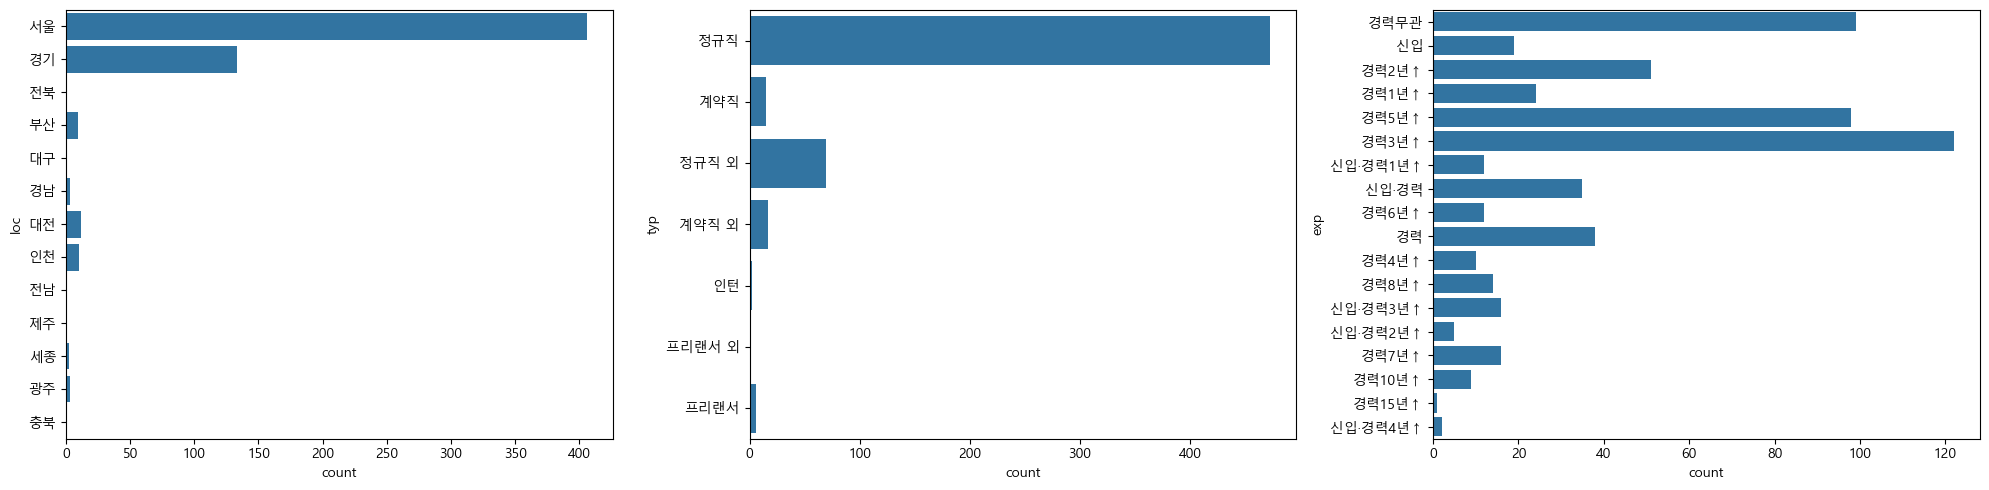

In [111]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.countplot(jobkorea['loc'])

plt.subplot(1, 3, 2)
sns.countplot(jobkorea['typ'])

plt.subplot(1, 3, 3)
sns.countplot(jobkorea['exp'])

plt.tight_layout()
plt.show()

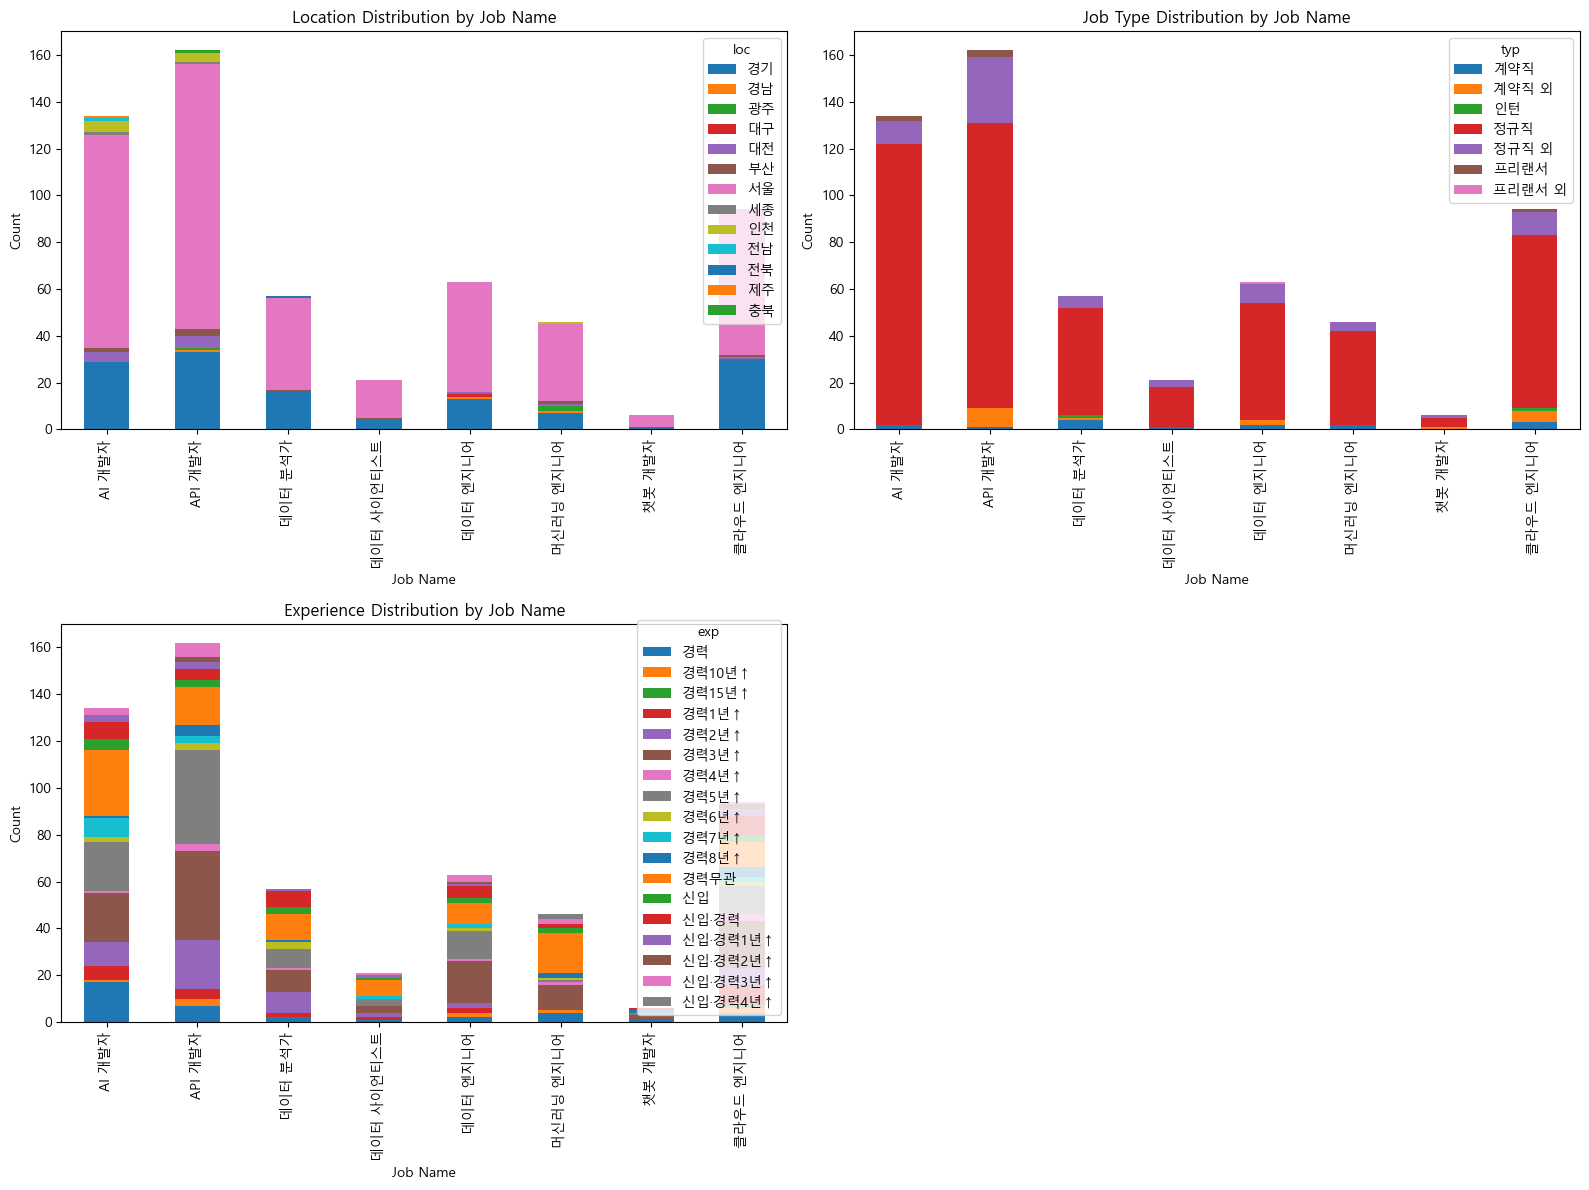

In [112]:
plt.figure(figsize=(16, 12))

# 1. Job Name 별 지역(loc) 분포
plt.subplot(2, 2, 1)
loc_dist = jobkorea.groupby('job_name')['loc'].value_counts().unstack().fillna(0)
loc_dist.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Location Distribution by Job Name')
plt.xlabel('Job Name')
plt.ylabel('Count')

# 2. Job Name 별 직업 유형(typ) 분포
plt.subplot(2, 2, 2)
typ_dist = jobkorea.groupby('job_name')['typ'].value_counts().unstack().fillna(0)
typ_dist.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Job Type Distribution by Job Name')
plt.xlabel('Job Name')
plt.ylabel('Count')

# 3. Job Name 별 경험(exp) 분포
plt.subplot(2, 2, 3)
exp_dist = jobkorea.groupby('job_name')['exp'].value_counts().unstack().fillna(0)
exp_dist.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Experience Distribution by Job Name')
plt.xlabel('Job Name')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


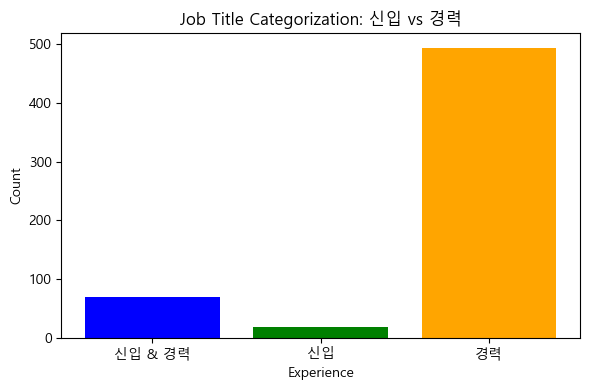

In [113]:
# 신입과 경력 포함 여부를 분리
newbie = jobkorea[jobkorea['exp'].str.contains('신입', na=False)]
experienced = jobkorea[jobkorea['exp'].str.contains('경력', na=False)] 

# 신입과 경력이 둘 다 포함된 직무
both = newbie[newbie['exp'].str.contains('경력', na=False)]

# 신입만 포함된 직무 (신입이 포함되고 경력은 포함되지 않음)
only_newbie = newbie[~newbie['exp'].str.contains('경력', na=False)]

# 경력만 포함된 직무 (경력이 포함되고 신입은 포함되지 않음)
only_experienced = experienced[~experienced['exp'].str.contains('신입', na=False)]

# 각 카운트
counts = {
    '신입 & 경력': both.shape[0],
    '신입': only_newbie.shape[0],
    '경력': only_experienced.shape[0]
}

# 시각화
plt.figure(figsize=(6, 4))
plt.bar(counts.keys(), counts.values(), color=['blue', 'green', 'orange'])
plt.title('Job Title Categorization: 신입 vs 경력')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.tight_layout()
plt.show()